In [1]:
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer



## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [2]:
train, validate, test = wrangle.wrangle_zillow()


In [3]:
train.head()

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,value_cat
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0,1
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0,1
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0,0


In [4]:
train.shape

(832786, 8)

In [5]:
train.dtypes

bedroom_count     float64
bathroom_count    float64
calc_sqr_feet     float64
tax_value         float64
yearbuilt         float64
taxamount         float64
county_code       float64
value_cat           int64
dtype: object

In [6]:
train.value_cat.value_counts()

0    579307
1    205623
2     30889
3      9249
4      7269
5       438
6        11
Name: value_cat, dtype: int64

In [7]:
X_train, X_validate = train[['bedroom_count','bathroom_count','calc_sqr_feet','yearbuilt','taxamount']], validate[['bedroom_count','bathroom_count','calc_sqr_feet','yearbuilt','taxamount']]
y_train, y_validate = train.tax_value, validate.tax_value

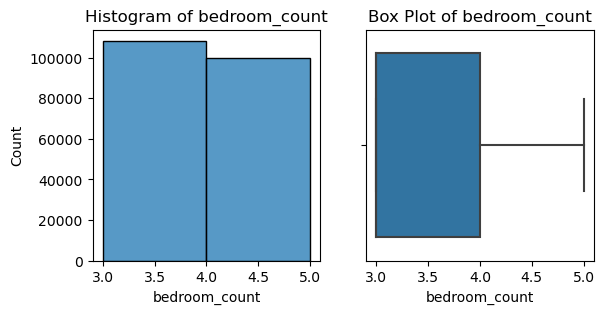

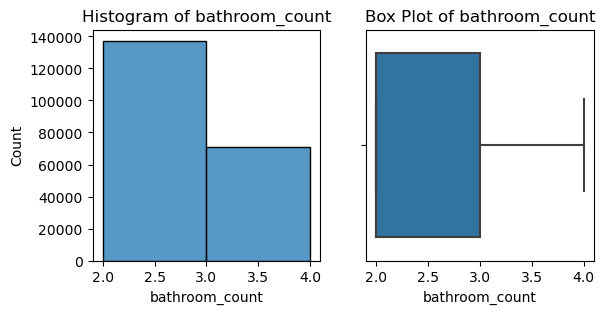

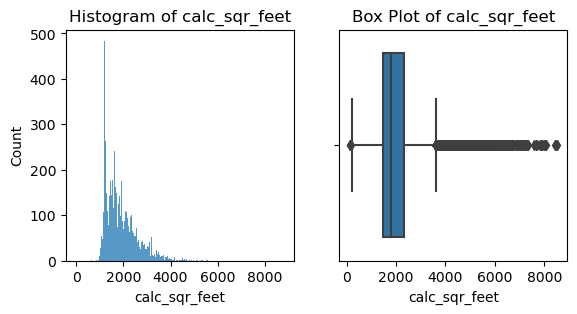


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x14c9852d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x14fcbeb90> (for post_execute):


KeyboardInterrupt: 

In [8]:
for column in train.columns:
    plt.figure(figsize=(10, 3))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=train.sample(frac = 0.25) ,x=column, binwidth = 1)
    plt.title(f'Histogram of {column}')
    
    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=train.sample(frac = 0.25) ,x=column)
    plt.title(f'Box Plot of {column}')
    
    
    
    plt.show()


### Min/Max Scale

In [9]:

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_validate_scaled = scaler.transform(X_validate)

In [10]:
X_train.head()


,bedroom_count,bathroom_count,calc_sqr_feet,yearbuilt,taxamount
947232,5.0,3.5,3432.0,2001.0,13320.60
1559262,3.0,3.0,1671.0,1947.0,3187.08
770438,3.0,2.0,1672.0,1959.0,2093.45
245576,4.0,2.0,2054.0,2002.0,8507.10
1695674,3.0,2.0,2132.0,1958.0,3159.90


In [11]:
X_train.bedroom_count.value_counts()

3.0    434003
4.0    334359
5.0     64424
Name: bedroom_count, dtype: int64

In [12]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,bedroom_count,bathroom_count,calc_sqr_feet,yearbuilt,taxamount
0,1.0,0.75,0.388317,0.870690,0.110976
1,0.0,0.50,0.188951,0.405172,0.026447
2,0.0,0.00,0.189064,0.508621,0.017325
3,0.5,0.00,0.232311,0.879310,0.070824
4,0.0,0.00,0.241141,0.500000,0.026221


In [13]:
X_train_scaled_df.bedroom_count.value_counts()

0.0    434003
0.5    334359
1.0     64424
Name: bedroom_count, dtype: int64

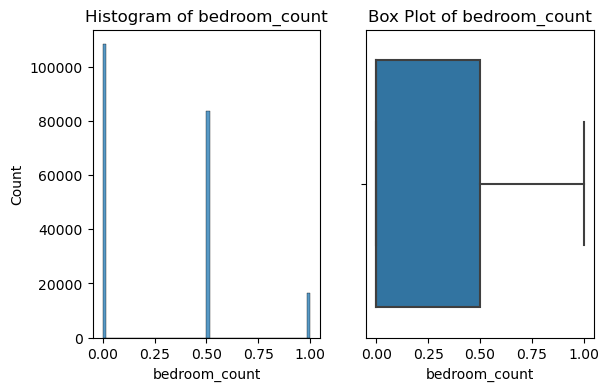

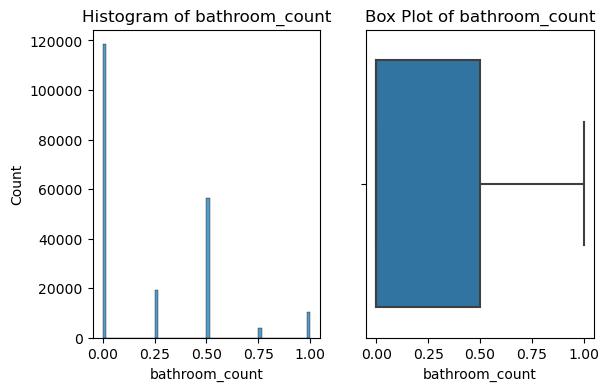

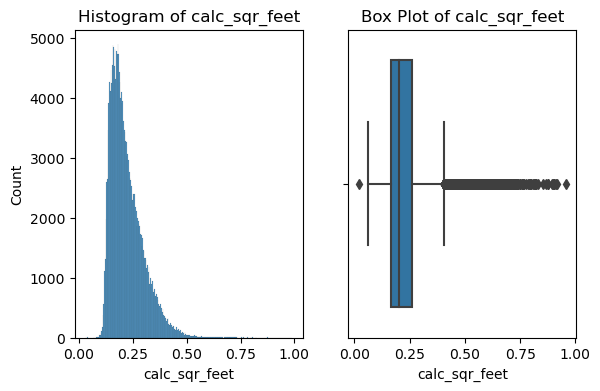

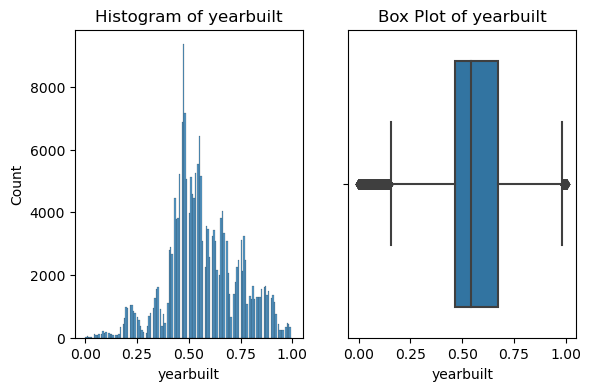

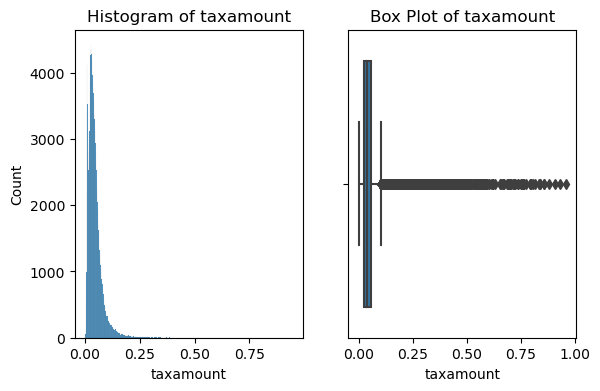

In [14]:
for column in X_train_scaled_df.columns:
    plt.figure(figsize=(10, 4))
    
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Histogram of {column}')
    
    
    
   
    plt.subplot(1, 3, 2)
    sns.boxplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Box Plot of {column}')
    
    
    
    plt.show()

## Standard Scale

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_validate_scaled = scaler.transform(X_validate)

In [16]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,bedroom_count,bathroom_count,calc_sqr_feet,yearbuilt,taxamount
0,2.278390,1.815436,2.196112,1.780224,1.730152
1,-0.877742,0.954882,-0.426747,-0.961325,-0.483618
2,-0.877742,-0.766226,-0.425257,-0.352092,-0.722532
3,0.700324,-0.766226,0.143699,1.830994,0.678594
4,-0.877742,-0.766226,0.259873,-0.402861,-0.489555


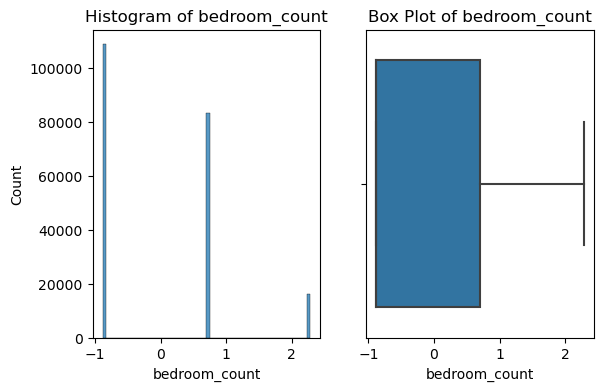

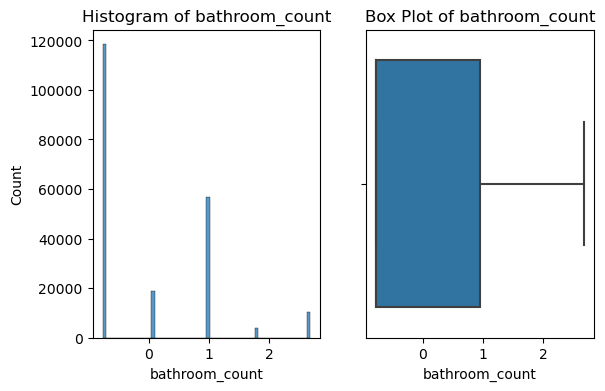

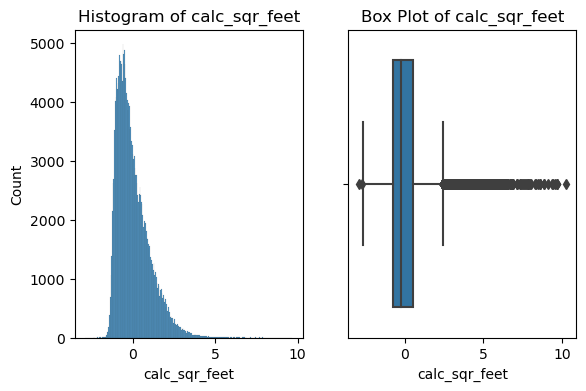

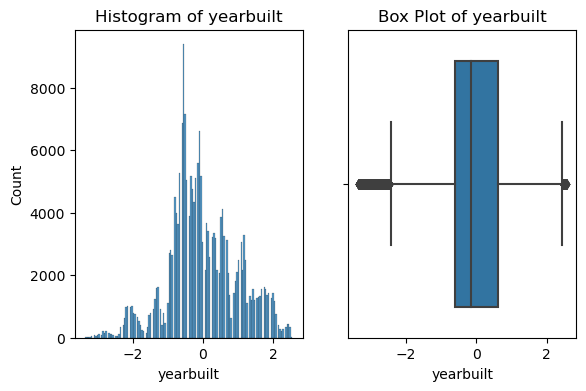

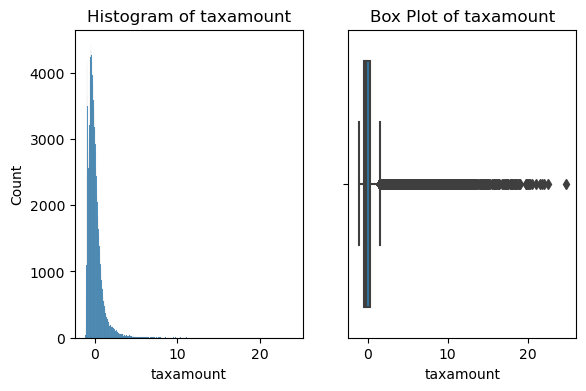

In [17]:
for column in X_train_scaled_df.columns:
    plt.figure(figsize=(10, 4))
    
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Histogram of {column}')
    
    
    
   
    plt.subplot(1, 3, 2)
    sns.boxplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Box Plot of {column}')
    
    
    
    plt.show()

## Robust Scaler

In [18]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_validate_scaled = scaler.transform(X_validate)

In [19]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,bedroom_count,bathroom_count,calc_sqr_feet,yearbuilt,taxamount
0,2.0,1.5,1.908985,1.583333,2.329283
1,0.0,1.0,-0.145858,-0.666667,-0.324008
2,0.0,0.0,-0.144691,-0.166667,-0.610356
3,1.0,0.0,0.301050,1.625000,1.068949
4,0.0,0.0,0.392065,-0.208333,-0.331125


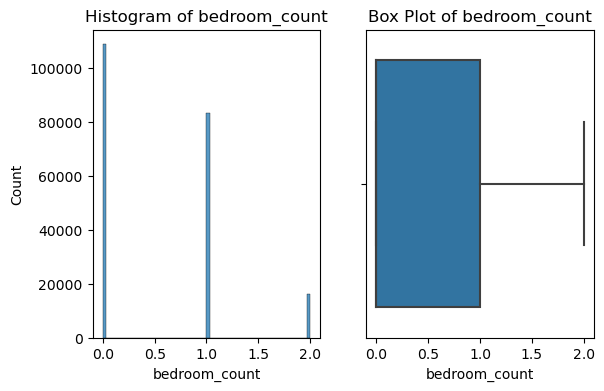

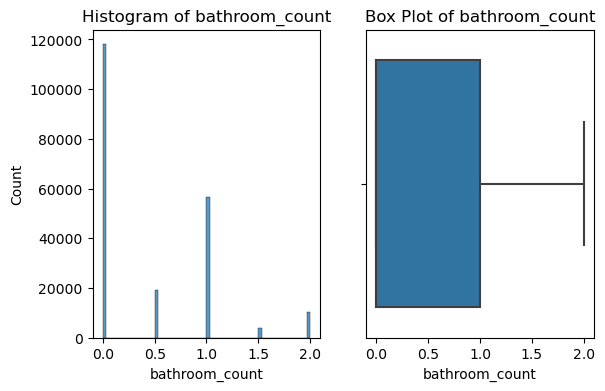

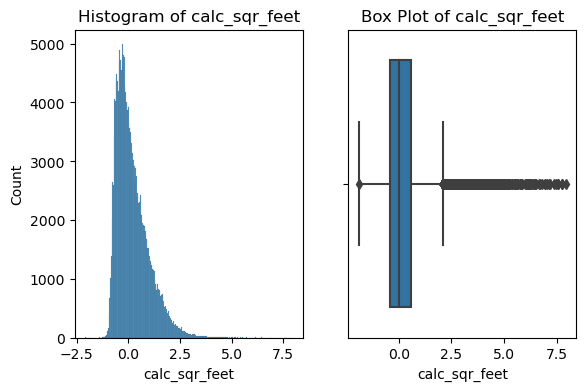

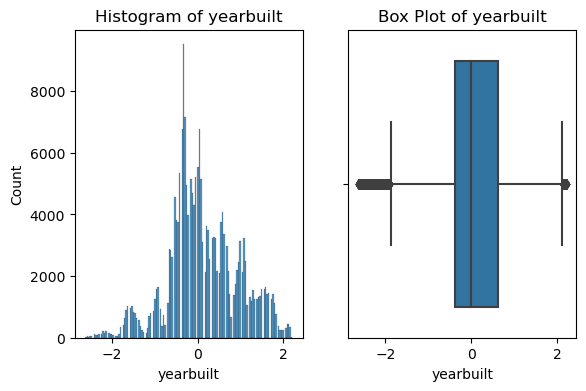

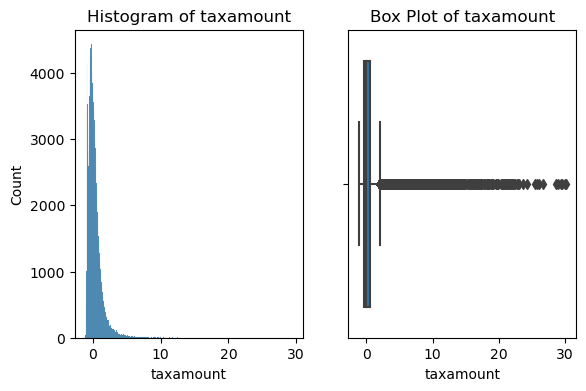

In [20]:
for column in X_train_scaled_df.columns:
    plt.figure(figsize=(10, 4))
    
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Histogram of {column}')
    
    
    
   
    plt.subplot(1, 3, 2)
    sns.boxplot(data=X_train_scaled_df.sample(frac = 0.25) ,x=column)
    plt.title(f'Box Plot of {column}')
    
    
    
    plt.show()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [21]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_validate_scaled = scaler.transform(X_validate)

In [22]:
inverse_train_scaled = scaler.inverse_transform(X_train_scaled)
inverse_train_scaled

array([[5.00000e+00, 3.50000e+00, 3.43200e+03, 2.00100e+03, 1.33206e+04],
       [3.00000e+00, 3.00000e+00, 1.67100e+03, 1.94700e+03, 3.18708e+03],
       [3.00000e+00, 2.00000e+00, 1.67200e+03, 1.95900e+03, 2.09345e+03],
       ...,
       [4.00000e+00, 2.50000e+00, 2.28200e+03, 1.97900e+03, 6.14984e+03],
       [3.00000e+00, 2.00000e+00, 1.71100e+03, 1.96200e+03, 6.02984e+03],
       [4.00000e+00, 3.00000e+00, 2.26200e+03, 1.96300e+03, 5.81184e+03]])

In [23]:
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train

NameError: name 'to_scale' is not defined

readjust to unscaled data

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

### Quantile Transformer

In [24]:
to_scale =['bedroom_count','bathroom_count','calc_sqr_feet','yearbuilt','taxamount']

In [25]:
def visualize_scaler(scaler, df, columns_to_scale, bins = 50):
    
    scaled_df = df.copy()
    scaled_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    
    plt.figure(figsize=(10, 6))
    for column in columns_to_scale:
        plt.subplot(1, len(columns_to_scale), columns_to_scale.index(column) + 1)
        sns.boxplot(data=scaled_df, y=column)
        plt.title(f'Box Plot of {column} (Scaled)')
    
    plt.tight_layout()
    plt.show()

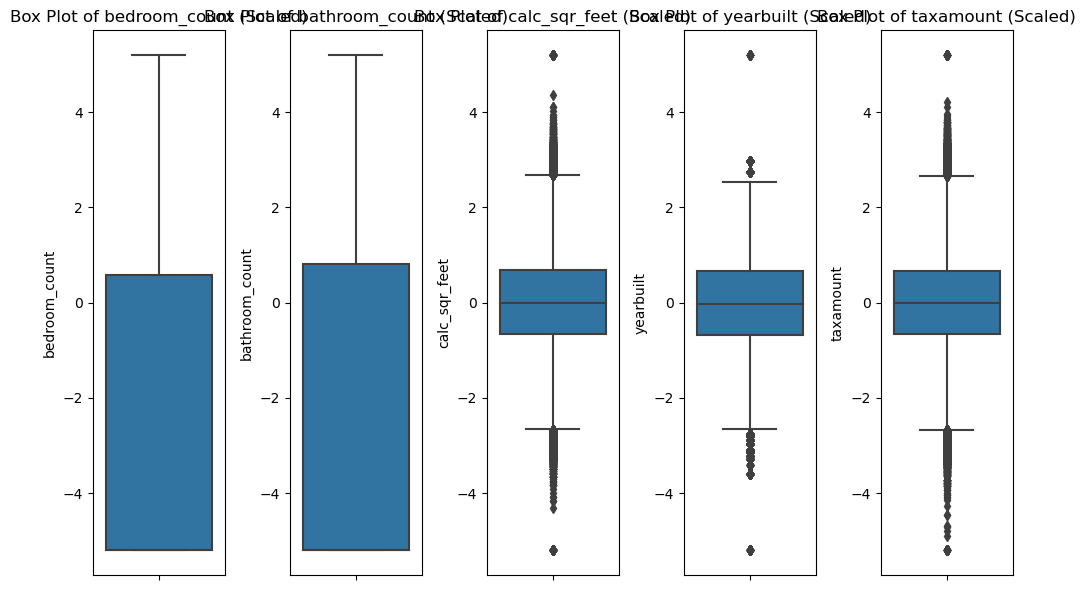

In [26]:
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=to_scale)

without output_distribution argument

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

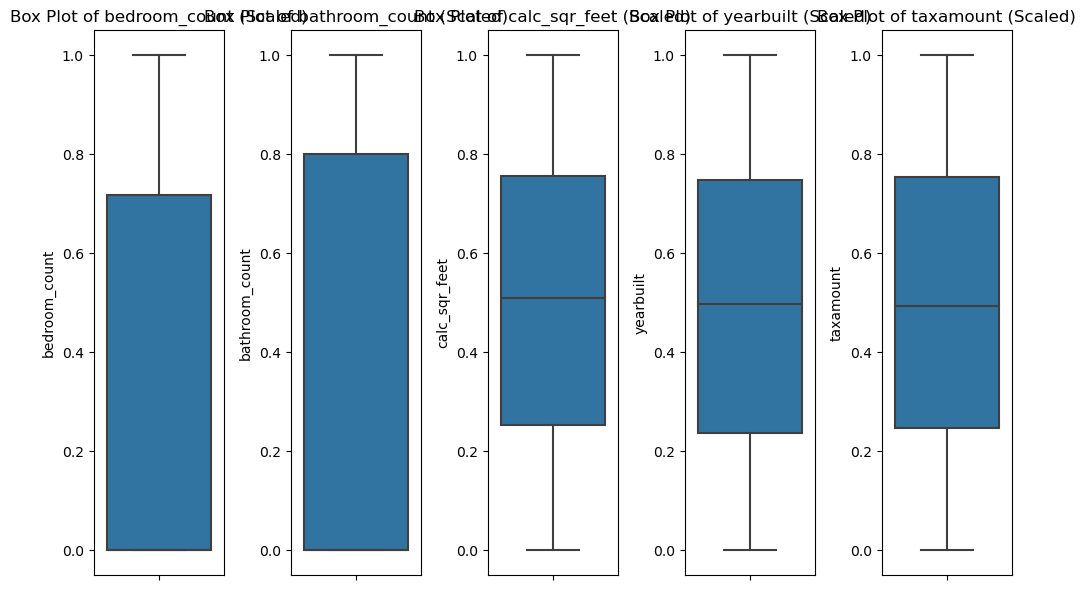

In [27]:
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=to_scale)


## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [28]:


def scale_data(train, validate, test):
    
    numeric_cols = ['bedroom_count','bathroom_count','calc_sqr_feet','yearbuilt','taxamount']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[numeric_cols])
    
    train_scaled[numeric_cols] = scaler.transform(train[numeric_cols])
    validate_scaled[numeric_cols] = scaler.transform(validate[numeric_cols])
    test_scaled[numeric_cols] = scaler.transform(test[numeric_cols])
    
    return train_scaled, validate_scaled, test_scaled





In [29]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [30]:
train_scaled

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,value_cat
947232,1.0,0.75,0.388317,893004.0,0.870690,0.110976,6059.0,1
1559262,0.0,0.50,0.188951,260933.0,0.405172,0.026447,6059.0,0
770438,0.0,0.00,0.189064,167176.0,0.508621,0.017325,6037.0,0
245576,0.5,0.00,0.232311,738566.0,0.879310,0.070824,6059.0,1
1695674,0.0,0.00,0.241141,114067.0,0.500000,0.026221,6037.0,0
...,...,...,...,...,...,...,...,...
1035662,1.0,0.50,0.261066,656000.0,0.508621,0.066948,6037.0,1
463244,0.0,0.00,0.192234,209048.0,0.482759,0.019980,6111.0,0
1766269,0.5,0.25,0.258123,527044.0,0.681034,0.051161,6111.0,1
324934,0.0,0.00,0.193479,485663.0,0.534483,0.050160,6037.0,0
